UPPGIFT 1a: Antal nollställen


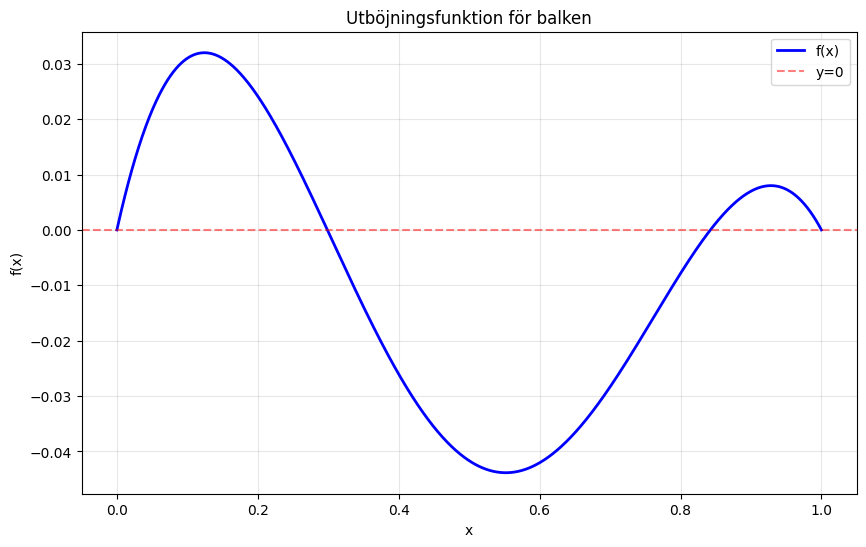


Antal nollställen på intervallet (0, 1.0): 4
(Exklusive eventuella nollställen vid ändpunkterna)
UPPGIFT 1b: Konvergensanalys av fixpunktsmetoden

Ungefärliga nollställen: [np.float64(0.2992012012012012), np.float64(0.8426566566566567)]

Konvergenskriterium: |g'(x*)| < 1 för konvergens

Analys av |g'(x*)| vid varje nollställe:
  Nollställe 1 (x ≈ 0.2992): |g'(x*)| = 1.1029 → Konvergerar: NEJ
  Nollställe 2 (x ≈ 0.8427): |g'(x*)| = 0.9383 → Konvergerar: JA
UPPGIFT 1c: Fixpunktsmetoden
Startvärde: x0 = 0.3
Tolerans: τ = 1e-10

    n             x_n   |x_n+1 - x_n|
    0    0.3001292486 1.2924859374e-04
    1    0.3002717965 1.4254792584e-04
    2    0.3004290128 1.5721626815e-04
    3    0.3006024074 1.7339464422e-04
    4    0.3007936461 1.9123862013e-04
    5    0.3010045659 2.1091980550e-04
    6    0.3012371934 2.3262750888e-04
    7    0.3014937639 2.5657056325e-04
    8    0.3017767433 2.8297933853e-04
    9    0.3020888512 3.1210795967e-04
   10    0.3024330880 3.4423675015e-04
 

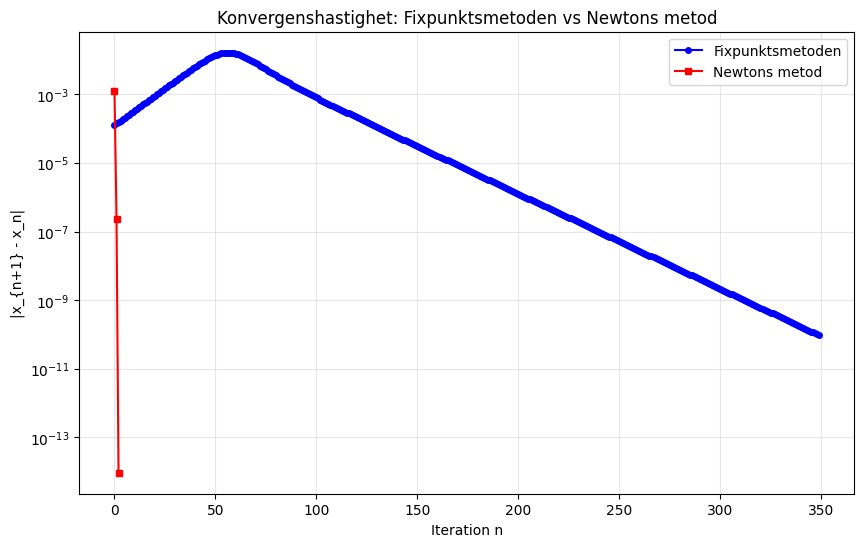

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametrar
L = 1.0

def f(x, L=1.0):
    # Utböjningsfunktion för balken
    return (8/3)*(x/L) - 3*(x/L)**2 + (1/3)*(x/L)**3 - (2/3)*np.sin(np.pi*x/L)

def df(x, L=1.0):
    # Derivata av utböjningsfunktionen
    return (8/3)/L - 6*(x/L)/L + (x/L)**2/L - (2/3)*(np.pi/L)*np.cos(np.pi*x/L)

def g(x, L=1.0):
    # Fixpunktsfunktion enligt uppgift 1b
    return (3*L/8) * (3*(x/L)**2 - (1/3)*(x/L)**3 + (2/3)*np.sin(np.pi*x/L))

def uppgift_1a():
    print("UPPGIFT 1a: Antal nollställen")
    
    x = np.linspace(0, L, 1000)
    y = f(x, L)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label='f(x)')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='y=0')
    plt.grid(True, alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Utböjningsfunktion för balken')
    plt.legend()
    plt.show()
    
    # Räkna nollställen (där funktionen byter tecken)
    sign_changes = np.sum(np.diff(np.sign(y)) != 0)
    print(f"\nAntal nollställen på intervallet (0, {L}): {sign_changes}")
    print("(Exklusive eventuella nollställen vid ändpunkterna)")

def uppgift_1b():
    print("UPPGIFT 1b: Konvergensanalys av fixpunktsmetoden")
    
    # Derivata av fixpunktsfunktionen
    def dg(x, L=1.0):
        return (3*L/8) * (6*(x/L)/L - (x/L)**2/L + (2/3)*(np.pi/L)*np.cos(np.pi*x/L))
    
    # Hitta nollställen approximativt
    x = np.linspace(0.001, L-0.001, 1000)
    y = f(x, L)
    
    # Hitta ungefärliga nollställen
    zero_indices = np.where(np.diff(np.sign(y)))[0]
    zeros_approx = []
    for idx in zero_indices:
        zeros_approx.append((x[idx] + x[idx+1])/2)
    
    print(f"\nUngefärliga nollställen: {zeros_approx}")
    print("\nKonvergenskriterium: |g'(x*)| < 1 för konvergens")
    print("\nAnalys av |g'(x*)| vid varje nollställe:")
    
    for i, x_star in enumerate(zeros_approx):
        dg_val = abs(dg(x_star, L))
        konvergerar = "JA" if dg_val < 1 else "NEJ"
        print(f"  Nollställe {i+1} (x ≈ {x_star:.4f}): |g'(x*)| = {dg_val:.4f} → Konvergerar: {konvergerar}")

def fixpunktsmetod(x0, L=1.0, tol=1e-10, max_iter=1000):

    # Fixpunktsmetoden för att hitta nollställe
    print("UPPGIFT 1c: Fixpunktsmetoden")
    print(f"Startvärde: x0 = {x0}")
    print(f"Tolerans: τ = {tol}")
    print("\n{:>5} {:>15} {:>15}".format("n", "x_n", "|x_n+1 - x_n|"))
    
    x_old = x0
    errors = []
    
    for n in range(max_iter):
        x_new = g(x_old, L)
        error = abs(x_new - x_old)
        errors.append(error)
        
        if n < 15 or error < tol:  # Visa första 15 iterationer och sista
            print(f"{n:5d} {x_new:15.10f} {error:15.10e}")
        
        # Avbrottsvillkor: |x_n+1 - x_n| < τ
        if error < tol:
            print(f"\nKonvergens uppnådd efter {n+1} iterationer")
            print(f"Nollställe: x = {x_new:.12f}")
            print(f"Kontroll f(x) = {f(x_new, L):.2e}")
            return x_new, errors
        
        x_old = x_new
    
    print(f"\nVARNING: Max antal iterationer ({max_iter}) uppnått!")
    return x_old, errors

def newtons_metod(x0, L=1.0, tol=1e-10, max_iter=100):

    # Newtons metod för att hitta nollställe

    print("UPPGIFT 1d: Newtons metod")
    print(f"Startvärde: x0 = {x0}")
    print(f"Tolerans: τ = {tol}")
    print("\n{:>5} {:>15} {:>15}".format("n", "x_n", "|x_n+1 - x_n|"))
    
    x_old = x0
    errors = []
    
    for n in range(max_iter):
        fx = f(x_old, L)
        dfx = df(x_old, L)
        
        if abs(dfx) < 1e-14:
            print("Derivatan är nära noll")
            break
        
        x_new = x_old - fx/dfx
        error = abs(x_new - x_old)
        errors.append(error)
        
        if n < 15 or error < tol:
            print(f"{n:5d} {x_new:15.10f} {error:15.10e}")
        
        # Avbrottsvillkor: |x_n+1 - x_n| < τ
        if error < tol:
            print(f"\nKonvergens uppnådd efter {n+1} iterationer")
            print(f"Nollställe: x = {x_new:.12f}")
            print(f"Kontroll f(x) = {f(x_new, L):.2e}")
            return x_new, errors
        
        x_old = x_new
    
    print(f"\nMax antal iterationer ({max_iter}) uppnått")
    return x_old, errors

def uppgift_1e():
    print("UPPGIFT 1e: Jämförelse av konvergenshastighet")
    
    # Välj ett nollställe där båda metoderna konvergerar (x ≈ 0.24)
    x0 = 0.3
    
    print(f"\nAnvänd samma startvärde för båda metoderna: x0 = {x0}")
    
    # Kör fixpunktsmetoden
    x_fix, errors_fix = fixpunktsmetod(x0, L, tol=1e-10)
    
    # Kör Newtons metod
    x_newton, errors_newton = newtons_metod(x0, L, tol=1e-10)
    
    # Plotta konvergenshastighet
    plt.figure(figsize=(10, 6))
    plt.semilogy(range(len(errors_fix)), errors_fix, 'b-o', 
                 label='Fixpunktsmetoden', markersize=4)
    plt.semilogy(range(len(errors_newton)), errors_newton, 'r-s', 
                 label='Newtons metod', markersize=4)
    plt.xlabel('Iteration n')
    plt.ylabel('|x_{n+1} - x_n|')
    plt.title('Konvergenshastighet: Fixpunktsmetoden vs Newtons metod')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    uppgift_1a()
    uppgift_1b()
    
    # 1c
    x_fix, _ = fixpunktsmetod(x0=0.3, L=L, tol=1e-10)
    
    # 1d
    x_newton, _ = newtons_metod(x0=0.7, L=L, tol=1e-10)
    
    uppgift_1e()